### Naive Bayes Training Script
#### Author: Austin Fernandez
#### Date Modified: April 25, 2020

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = []    
f = open("HighAndLowFeatures(edited).csv","r")
d_reader = csv.reader(f,delimiter=",",quotechar="\"")
first = True
for line in d_reader:
    if first:
        first = False
        continue
    data.append(line)
print(np.shape(data))

(267, 343)


In [3]:
x_train_untransformed = np.empty((0,339))
y_train = np.array([])

for line in data:
    x_train_untransformed = np.append(x_train_untransformed,np.array(list(map(float,line[1:-3]))).reshape((1,339)),axis=0)
    y_train = np.append(y_train,int(line[-1]))
scaler = MinMaxScaler()
scaler.fit(x_train_untransformed)
x_train = scaler.transform(x_train_untransformed)
print(x_train.shape)
print(y_train.shape)
#print(y_train)

(267, 339)
(267,)


In [4]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(480, 339) (480,)
(480, 339) (480,)


In [5]:
"""
Trains a model using the given data and a hyperparameter search object

Parameters:
x_train - input data
y_train - target labels for data
hp_search - model_selection object

Returns: best estimator for the given data given the model selector
"""
def train_model(x_train,y_train,hp_search):
    hp_search.fit(x_train,y_train)
    print("Best Score: {:.4f}".format(hp_search.best_score_))
    for k,v in hp_search.best_params_.items():
        print("{} => {}".format(k,v))
    print("Splits: {}".format(hp_search.n_splits_))
    y_out = hp_search.predict(x_train)
    print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
    return hp_search.best_estimator_

In [6]:
# MultinomialNB, Grid Search

parameters = {'alpha':[0.01 * i for i in range(1,101)], 'fit_prior':[True, False]}
mnb = MultinomialNB()
grid_search_multinomial = GridSearchCV(mnb, parameters,cv=5,n_jobs=-1)

Random Oversampling:
Best Score: 0.2521
alpha => 0.01
fit_prior => True
Splits: 5
Accuracy: 31.8750%


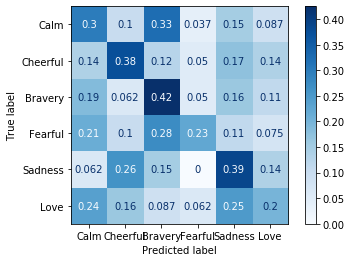

In [7]:
print("Random Oversampling:")
train_model(x_os,y_os,grid_search_multinomial)
disp = plot_confusion_matrix(grid_search_multinomial, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

SMOTE:
Best Score: 0.2500
alpha => 0.16
fit_prior => True
Splits: 5
Accuracy: 36.2500%


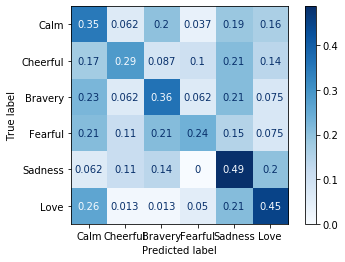

In [8]:
print("SMOTE:")
train_model(x_smote,y_smote,grid_search_multinomial)
disp = plot_confusion_matrix(grid_search_multinomial, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [11]:
# CategoricalNB, Grid Search
parameters = {'alpha':[0.01 * i for i in range(1,101)], 'fit_prior':[True, False]}
canb = CategoricalNB()
grid_search_categorical = GridSearchCV(canb, parameters,cv=5,n_jobs=-1)

In [12]:
print("Random Oversampling:")
train_model(x_os,y_os,grid_search_categorical)
disp = plot_confusion_matrix(grid_search_categorical, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

Random Oversampling:


IndexError: index 1 is out of bounds for axis 1 with size 1

In [13]:
print("SMOTE:")
train_model(x_smote,y_smote,grid_search_categorical)
disp = plot_confusion_matrix(grid_search_categorical, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

SMOTE:


IndexError: index 1 is out of bounds for axis 1 with size 1

In [14]:
# ComplementNB, Grid Search
parameters = {'alpha':[0.01 * i for i in range(1,101)], 'fit_prior':[True, False], 'norm' : [True, False]}
cnb = ComplementNB()
grid_search_complement = GridSearchCV(cnb, parameters,cv=10,n_jobs=-1)

Random Oversampling:
Best Score: 0.2271
alpha => 0.21
fit_prior => True
norm => False
Splits: 10
Accuracy: 31.4583%


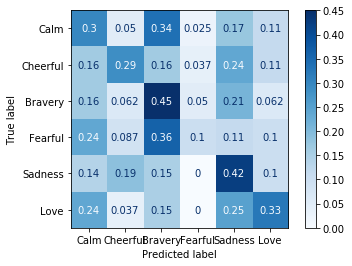

In [15]:
print("Random Oversampling:")
train_model(x_os,y_os,grid_search_complement)
disp = plot_confusion_matrix(grid_search_complement, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

SMOTE:
Best Score: 0.2687
alpha => 0.07
fit_prior => True
norm => False
Splits: 10
Accuracy: 35.2083%


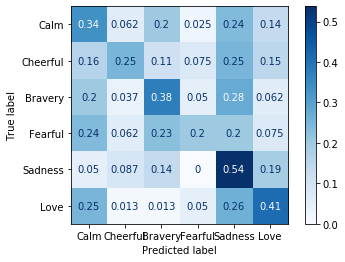

In [16]:
print("SMOTE:")
train_model(x_smote,y_smote,grid_search_complement)
disp = plot_confusion_matrix(grid_search_complement, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [17]:
# ComplementNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {'alpha':uniform(loc=0,scale=1.0), 'fit_prior':[True, False], 'norm' : [True, False]}
cnb = ComplementNB()
random_search_complement = RandomizedSearchCV(cnb, parameters,cv=k_folds,n_iter=random_search_iterations,n_jobs=-1)

Random Oversampling:
Best Score: 0.2271
alpha => 0.4317413348789446
fit_prior => False
norm => False
Splits: 10
Accuracy: 31.6667%


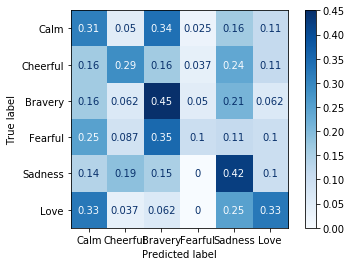

In [18]:
print("Random Oversampling:")
train_model(x_os,y_os,random_search_complement)
disp = plot_confusion_matrix(random_search_complement, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

SMOTE:
Best Score: 0.2687
alpha => 0.215433465070205
fit_prior => True
norm => False
Splits: 10
Accuracy: 35.2083%


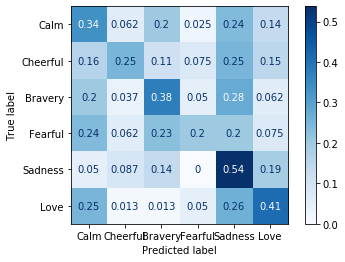

In [19]:
print("SMOTE:")
train_model(x_smote,y_smote,random_search_complement)
disp = plot_confusion_matrix(random_search_complement, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [20]:
# CategoricalNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {'alpha':uniform(loc=0,scale=1.0), 'fit_prior':[True, False]}
canb = CategoricalNB()
random_search_categorical = RandomizedSearchCV(canb, parameters,cv=k_folds,n_iter=random_search_iterations,n_jobs=-1)

In [21]:
print("Random Oversampling:")
train_model(x_os,y_os,random_search_categorical)
disp = plot_confusion_matrix(random_search_categorical, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

Random Oversampling:


IndexError: index 1 is out of bounds for axis 1 with size 1

In [22]:
print("SMOTE:")
train_model(x_smote,y_smote,random_search_categorical)
disp = plot_confusion_matrix(random_search_categorical, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

SMOTE:


IndexError: index 1 is out of bounds for axis 1 with size 1

In [23]:
# MultinomialNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {'alpha':uniform(loc=0,scale=1.0), 'fit_prior':[True, False]}
mnb = MultinomialNB()
random_search_multinomial = RandomizedSearchCV(mnb, parameters,cv=k_folds,n_iter=random_search_iterations,n_jobs=-1)
random_search_multinomial.fit(x_train,y_train)
print("Best Score: {:.4f}".format(random_search_multinomial.best_score_))
for k,v in random_search_multinomial.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(random_search_multinomial.n_splits_))
y_out = random_search_multinomial.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3483
alpha => 0.9078983330366669
fit_prior => True
Splits: 10
Accuracy: 38.2022%


Random Oversampling:
Best Score: 0.2375
alpha => 0.25321275935929477
fit_prior => True
Splits: 10
Accuracy: 32.5000%


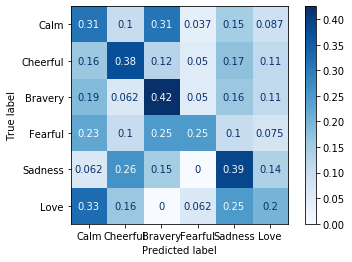

In [24]:
print("Random Oversampling:")
train_model(x_os,y_os,random_search_multinomial)
disp = plot_confusion_matrix(random_search_multinomial, x_os, y_os,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

SMOTE:
Best Score: 0.2833
alpha => 0.16520841692055266
fit_prior => True
Splits: 10
Accuracy: 36.2500%


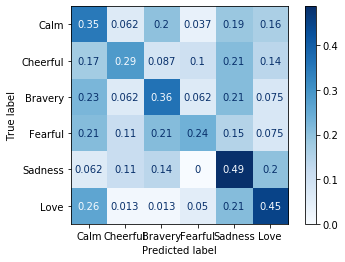

In [25]:
print("SMOTE:")
train_model(x_smote,y_smote,random_search_multinomial)
disp = plot_confusion_matrix(random_search_multinomial, x_smote, y_smote,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')